# **MNA - IAyAA**
## **Actividad Complementaria no Evaluable : Titanic**
## **Semanas 5 y 6**




https://www.kaggle.com/datasets/yasserh/titanic-dataset

### **Datos reales de la tragedia del Titanic del 15 de abril de 1912:**

*   Sobrevivió el 38% (706), Falleció el 62% (1517) de un total de 2223 pasajeros y tripulantes.
*   Sobrevivientes:
    * 1a clase: 62%
    * 2a clase: 41%
    * 3a clase: 25%
    * Mujeres: 75%
    * Niñ@s: 50%
    * Hombres: 20%



### **Te recomiendo revisar el Capítulo 2 del libro de la biblioteca digital Hands-on Machine Learning with Scikit-learn, Keras and TensorFlow, 3rd Edition, de Aurelien Geron, de la editorial O'Reilly. Es algo extenso, pero puedes ir leyéndolo en partes durante varias semanas, ya que tiene muchas sugerencias e ideas de cómo generar un buen modelo desde el inicio de la preparación de los datos, hasta llegar al modelo final.**

https://biblioteca.tec.mx/inicio

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
# Si queremos asegurar que en la partición los niveles de las categóricas queden estratificados lo mejor posible:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

In [2]:
titanicdata = sns.load_dataset('titanic')
df = pd.DataFrame(titanicdata)   # por facilidad consideremos los datps como un DataFrame de Pandas.
print(df.shape)
df.head().T

(891, 15)


,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22.0,38.0,26.0,35.0,35.0
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
class,Third,First,Third,First,Third
who,man,woman,woman,woman,man


Ver la siguiente liga para la identificación de los niveles "deck":

https://clickamericana.com/wp-content/uploads/White-Star-Line-Titanic-and-Olympic.jpg

In [3]:
df['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

/tmp/ipykernel_19776/3737423301.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['deck', 'survived']).size().unstack()


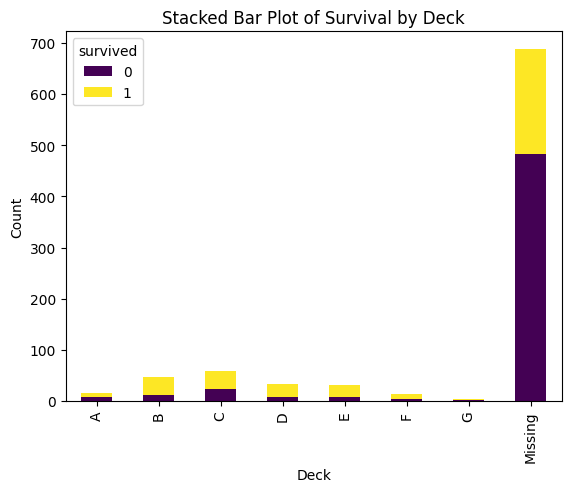

In [4]:
# Vamos a eliminar el factor "deck", pero visualicemos antes la cantidad de datos
# perdidos que tiene:
# Para reemplazar None con 'Missing':
df['deck'] = df['deck'].cat.add_categories(['Missing']).fillna('Missing')

# Podemos agrupar los datos por 'deck' y 'survived' y contar las ocurrencias:
grouped = df.groupby(['deck', 'survived']).size().unstack()

# Obtengamos un gráfico de pila:
grouped.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Deck')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Survival by Deck')
plt.show()

### Variables con la misma información: "survived" y "alive"; "pclass" y "class"; "embarked" y "embark_town".

### También eliminaremos por el momento la variable "deck".



In [5]:
df.drop(['alive','class','embark_town',
         'deck'
         ], axis=1, inplace=True)
print(df.shape)
df.head().T

(891, 11)


,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22.0,38.0,26.0,35.0,35.0
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
who,man,woman,woman,woman,man
adult_male,True,False,False,False,True


*   **survived:** Sobrevive: No(0), Sí(1)
*   **pclass:** Boleto clase: 1a,2a,3a
*   **sex:** female, male
*   **age:** Edad en años: 0.42 a 80
*   **sibsp:** Número de herman@s, medios herman@s y espos@s: 0 a 8 sin ciertos niveles
*   **parch:** Número de padres e hij@s a bordo, incluyendo hij@s adoptados: 0 a 6
*   **fare:** Costo del boleto (libras): de \$0 a \$512.3
*   **embarked:** Puerto de embarque: Cherbourg(C), Queenstown(Q), Southampton(S)
*   **who:** Hombre, mujer, niñ@
*   **adult_male:** Hombre adulto: Falso, Verdadero
*   **alone:** Viaja solo: Falso, Verdadero


## **PREGUNTA:**

## **¿Cómo se afecta el entrenamiento el usar por ejemplo una partición de 60%-20%-20% o una de 80%-10%-10%? ¿Cuándo se recomendaría usar una u otra de estas particiones?**


In [6]:
Xtrain, Xtv, ytrain, ytv = train_test_split(df.iloc[:,1:], df.iloc[:,0],
                                            train_size=0.6,
                                            random_state=0
                                            )
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv,
                                            train_size=0.5,
                                            random_state=0
                                            )

print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)


(534, 10) (534,)
(178, 10) (178,)
(179, 10) (179,)


In [ ]:
# Separemos variables numéricas y categóricas.
# Supongamos que las separamos como se indica a continuación.

cat_ord_lista = ['pclass']    # lista de las variables ordinales

cat_nom_lista = ['sex','adult_male','embarked','who','alone']   # lista de variables nominales(& binarias)

num_lista = ['age','sibsp','parch','fare']    # lista de las variables numéricas.

## **Análisis Variables Categóricas**

In [ ]:
print(Xtrain['pclass'].value_counts())
print(Xtrain['pclass'].value_counts() / Xtrain.shape[0])

In [ ]:
print(Xtrain['sex'].value_counts())
print(Xtrain['sex'].value_counts() / Xtrain.shape[0])

In [ ]:
print(Xtrain['adult_male'].value_counts())
print(Xtrain['adult_male'].value_counts() / Xtrain.shape[0])

In [ ]:
print(Xtrain['embarked'].value_counts())
print(Xtrain['embarked'].value_counts() / Xtrain.shape[0])

In [ ]:
print(Xtrain['who'].value_counts())
print(Xtrain['who'].value_counts() / Xtrain.shape[0])

In [ ]:
print(Xtrain['alone'].value_counts())
print(Xtrain['alone'].value_counts() / Xtrain.shape[0])

In [ ]:
# Y la variable de salida:

tmp = pd.DataFrame(yval)

print(tmp.value_counts())
print(tmp.value_counts() / tmp.shape[0])

## **PREGUNTA:**

## **¿Qué transformaciones consideras serían adecuadas aplicar a las categóricas, de ser el caso?**

## **Análisis Variables Numéricas**

In [ ]:
Xtrain[num_lista].hist();

In [ ]:
Xtrain[num_lista].boxplot(vert=False);

## **PREGUNTA:**

## **¿Qué transformaciones consideras serían adecuadas aplicar a las numéricas, de ser el caso?**

In [ ]:
# variables numéricas:
num_pipe = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                             ('minmax', MinMaxScaler())])
num_pipe_nombres = num_lista


# variables ordinales:
catord_pipe = Pipeline(steps = [('impOrd', SimpleImputer(strategy='most_frequent')),
                                ('ordtrasnf', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))])
catord_pipe_nombres = cat_ord_lista


#variables nominales y binarias:
catnom_pipe = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))])
catnom_pipe_nombres = cat_nom_lista


columnasTransformer = ColumnTransformer(transformers = [('num_transf', num_pipe, num_pipe_nombres),
                                                        ('catord_transf', catord_pipe, catord_pipe_nombres),
                                                        ('catnom_transf', catnom_pipe, catnom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


In [ ]:
# Conjuntamos conjunto de Entrenamiento y Validación para usar Cross-Validation:

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)

print(Xtrainval.shape, ytrainval.shape)

## **¿Por qué concatenamos estos conjuntos?**

In [ ]:
# Podemos verifcar la cantidad de columnas nuevas que se estarán generando después
# de aplicar las transformaciones (usualmente con lo que se llama ingeniería de
# características podrían también agregarse más variables):

Xtmp = Xtrainval.copy()
tmp = columnasTransformer.fit_transform(Xtmp)

print("Antes de las transformaciones:", Xtmp.shape)
print("Después de las transformaciones:", tmp.shape)

In [ ]:
# Dependiendo del tipo de problema, deberás seleccionar las librerías de los
# modelos correspondientes:

# Modelos de Regresión:
#from sklearn.linear_model import LinearRegression
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
#from sklearn.neural_network import MLPRegressor
#from sklearn.svm import SVR

# Modelos de Claisficación:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

XGBoost-Clasificación:

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier

XGBost-Regresión:

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor


Puedes consultar la lista de métricas en la siguiente liga:

https://scikit-learn.org/stable/modules/model_evaluation.html

## **PREGUNTA:**

## **Ejecuta primeramente el modelo con sus hiperparámetros predeterminados y luego trata de ir razonando cómo y cuáles modificar.**

## **En general con cada modelo se pueden aplicar también los métodos de GridSearchCV() o bien RandomizedSearchCV() de Scikit-learn para la búsqueda de los mejores hiperparámetros; pero por el momento hagámoslo de manera "manual" para tener una mejor comprensión del efecto de cada uno de dichos argumentos.**

## **Para verificar que el modelo no esté sobreentrenado o subentrenado tendrás que monitorear de preferencia una métrica, la que consideres más importante. Sin embargo, no significa que las demás debas ignorarlas, sino que simplemente estarás haciendo el llamado ajuste de hiperparámetros, o ajuste fino (en inglés llamado fine-tuning) con respecto a tu métrica de mayor interés.**

## **Antes de iniciar, ¿podríamos establecer un primer valor de entrada de la Exactitud (Accuracy) a partir del cual pudiéramos decir que el modelo está sub-entrenado? Indica qué valor tomarás como referencia en este problema para determinar que un modelo está sub-entrenado: ... [incluye aquí tu respuesta] ...**

## **Y para el caso sobre-entrenado, ¿cuándo podríamos decir que el modelo está sobre-emntrenado? Indica qué criterio tomarás como referencia en este problema para determinar que un modelo está sobre-entrenado: ... [incluye aquí tu respuesta] ...**

### En realidad el umbral para determinar cuándo se tiene un modelo sobreentrenado es relativo, pero en general se puede tomar siempre para iniciar que la diferencia entre entrenamiento y validación no sea mayor al 3% o 4%, en métricas de porcentaje.

In [ ]:
# Verificando versiones de XGBoost y Scikit-learn:

import xgboost
import sklearn

print("Versiones al iniciar aquí:")
print(xgboost.__version__)
print(sklearn.__version__)

In [ ]:
# Requerimos la versión 1.3.0 de Scikit-learn.
# Una vez terminado de actualizar te pedirá que reinicies la sesión.
# Reinicia, pero sin desconectar la sesión.
!pip install scikit-learn==1.3.0

In [ ]:
import xgboost
import sklearn


# Verifiquemos de nuevo las versiones:
print("Versiones actualizadas:")
print(xgboost.__version__)
print(sklearn.__version__)

In [ ]:
# Veamos algunas variantes de los hiperparámetros de cada modelo
# para que te familiarices con la manera en que afecta cada uno
# de ellos en su desempeño:

def modelos():
  modelos, nombres = list(), list()



  # Regresión Logística:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

  modelos.append(LogisticRegression(max_iter=100,    # 10, 100, 1000
                                    C = 1.0,     # 0.000001, 0.005, 0.01,  1000
                                    #random_state=1
                                    ))
  nombres.append('LR')



  # k-Vecinos Más Cercanos:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

  modelos.append(KNeighborsClassifier(n_neighbors = 5,     # 1, 5, 21, 201
                                      ))
  nombres.append('kNN')



  # Árbol de Decisión:
  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

  modelos.append(DecisionTreeClassifier(max_depth = None,       # None, 5, 3, 1
                                        min_samples_split=2,   # 2,3,5, 20
                                        #min_samples_leaf=1,  # trata al inicio de usar solo uno de estos, split o leaf, para su mejor comprensión.
                                        #random_state=7
                                        ))
  nombres.append('DTree')



  # Bosque Aleatorio:
  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

  modelos.append(RandomForestClassifier(n_estimators= 100,    # 100
                                        max_depth= None,      # None, 1, 2,3, 4, 5, 6 ... ¿Se esperaría la misma profunidad en un RF y en un DT?
                                        min_samples_split=2,    # 2, 5, 15
                                        #random_state=0
                                        ))
  nombres.append('RF')




  # XGBoost:
  # https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
  # https://xgboost.readthedocs.io/en/stable/parameter.html

  modelos.append(XGBClassifier(booster= 'gbtree',
                               n_estimators=100,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                               max_depth= 6,             # 1,3, 6,
                               learning_rate=0.3,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                               subsample=1.0,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                               #random_state=5,
                               objective='binary:logistic',
                               n_jobs=-1))
  nombres.append('XGBoost')




  # Red Neuronal Artificial: Perceptrón MultiCapa:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

  modelos.append(MLPClassifier(hidden_layer_sizes=(30,),     # 100,  6, 24, 30, (15,15), (50,50)
                               activation='logistic',
                               max_iter=1000,                  # 200,
                               alpha=0.0001,               # término de regularización L2.
                               #learning_rate='constant',       # tasa de aprendizaje o tamaño de paso del método Gradiente Descendente.
                               #learning_rate_init=0.001,
                               #random_state=1
                               ))
  nombres.append('MLP')



  # Máquina de Vector Soporte : Support Vector Machine
  # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

  modelos.append(SVC(kernel='rbf',
                     C= 1.0,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                     gamma= 'scale',           # scale,  0.005
                     #class_weight='balanced',     # Siempre puedes hacer uso del balanceo en caso de que ayude.
                     #random_state=7
                     ))
  nombres.append('SVM')





  return modelos, nombres



# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

modelo, nombres = modelos()
resultados = list()

for i in range(len(modelo)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos calcular dependiendo el tipo de problema.
  # No tienes que incluir todas en cada problema, pero usemos varias a manera de ejemplo:
  mismetricas = {'miacc':'accuracy',
                 'mipre':'precision',
                 'mirec':'recall',
                 'mif1':'f1',
                 'miroc':'roc_auc'}   # métricas de clasificación
  """
  mismetricas = {'mimse':'neg_mean_squared_error',
                 'mirmse':'neg_root_mean_squared_error',
                 'mimape':'neg_mean_absolute_percentage_error',
                 'mir2':'r2'}  # métricas de regresión
  """

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))  # también puedes usar nanmean y nanstd.



In [ ]:
resultados   # aquí tienes toda la información generada durante el entrenamiento.

In [ ]:
# En la lista de salida "resultados" está toda la información generada durante
# el entrenamiento para cada métrica que se indicó. Dependiendo la métrica de
# interés se puede seguir analizando, de preferencia el conjunto de validación o
# prueba. Por ejemplo, hagamos un diagrama de caja para alguna de ellas:

tmp = [resultados[j]['test_mipre'] for j in range(len(resultados)) ]

plt.boxplot(tmp, labels=nombres, showmeans=True)
plt.show()

## **Mejor Modelo Final:**

### **Supongamos que nuestra métrica de interés en este problema sea la precisión, ¿qué significa el valor de la precisión en el contexto del problema del Titanic?**

Supongamos a continuación que el modelo de SVM tuvo el mejor desempeño con la métrica de Precision.

In [ ]:
# Seleccionemos los mismos valores de los hiperparámetros obtenidos previamente.
# Sin embargo aquí podemos hacer una nueva búsqueda más detallada con algunos de
# los métodos GridSearchCV() o RandomizedSearchCV() de sklearn, para tratar de
# mejorar más el desempeño de este modelo.

# Consulta la documentación respectiva:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Supongamos que los siguientes valores de hiperparámetros son los mejores que encontramos,
# entonces generemos ahora nuestro modelo final con el conjunto de prueba (Test) y
# conjuntando los datos de Entrenamiento y Validación para que nuestro modelo pueda
# en dado caso mejorar en lo que pueda, su desempeño:


# Modelo Final:
# Mejores hiperparámetros encontrados:
mf = SVC(kernel='rbf', C= 1.0,gamma= 'scale')

mf_pipe = Pipeline(steps=[('ct',columnasTransformer),('m',mf)])

# Para este último modelo ajustamos por última vez con Train y Val:
mf_pipe.fit(Xtrainval,ytrainval)


# Y verificamos el desempeño con el conjunto de Prueba (Test):
yhat = mf_pipe.predict(Xtest)

print(classification_report(ytest, yhat))

print('Métrica-ROC-Test:', np.round(roc_auc_score(ytest, yhat), 2))

In [ ]:
# O bien, usando la matriz de confusión y calculando directamente cada métrica:

cm = confusion_matrix(ytest, yhat)  # Con este acomodo, los renglones son los datos reales y las columnas las predicciones.
cm

In [ ]:
VN = cm[0,0]
VP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

# De aquí puedes obtener cualquiera de las métricas que desees.
# Por ejemplo, la precisión, usando su fórmula:
mi_precision = VP / (VP + FP)
mi_precision